# Библиотеки Python для DS (семинары в записи)

Урок 7. Практическая работа. Сравнение работы алгоритмов деревьев решений. Использование ансамблевых алгоритмов

Анализ рынка недвижимости Калифорнии с использованием ансамблевых методов
Цель задания: Использовать набор данных fetch_california_housing для построения и анализа моделей машинного обучения с акцентом на ансамблевые методы.

1. Загрузка и предварительный анализ данных:
Загрузите данные из предоставленного файла fetch_california_housing.xlsx.
Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

2. Предобработка данных:
Очистите данные от возможных аномалий и пропущенных значений.

3. Построение моделей:
— Разделите данные на обучающую и тестовую выборки.
— Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.
— Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

4. Оценка моделей:
— Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).
— Сравните результаты моделей, интерпретируйте их.

5. Анализ важности признаков и выводы:
— Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.
— На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

6. Дополнительные задачи (для желающих углубить знания):
— Проведите кросс-валидацию результатов.
— Исследуйте влияние удаления некоторых признаков на производительность моделей.


In [1]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import lightgbm
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Загружаем датасет
df = pd.read_excel('fetch_california_housing.xlsx')

##### 1. Загрузка и предварительный анализ данных:

Загрузите данные из предоставленного файла fetch_california_housing.xlsx.

Исследуйте структуру данных, проведите описательный анализ основных статистических показателей.

In [3]:
# Выводим дата фрейм
df.head()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


Этот фрейм данных содержит следующие столбцы:

1. MedInc (Средний доход населения в квартале)
2. HouseAge (Средний возраст дома в квартале)
3. AveRooms (Средние количество команат)
4. AveBedrms (Средние количество спален)
5. Population (Население квартала)
6. AveOccup (Средняя заполняемость дома)
7. Latitude (Широта жилого квартала)
8. Longitude (Долгота жилого квартала)
9. target (Средняя цена дома)

In [ ]:
# Выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


Из общей информации следует:
1. Всего 9 колонок
2. Нулевые значения отсуствуют
3. Нет пропущеных записей в колонках
4. Все колонки находятся в дробных float64 значениях, кроме "HouseAge" и "Population" они в int64

In [ ]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. MedInc (Средний доход населения в квартале):
- Средний доход населения на уровне 3.53
- Миниманая 0.49
- Максимальная 15.00
- Медиана равна 3.87
- Отклонение состовляет 1.89
2. HouseAge (Средний возраст дома в квартале):
- Средние средний возраст дома на уровне 29.00
- Миниманая 1.00
- Максимальная 52.00
- Медиана равна 28.63
- Отклонение состовляет 12.58
3. AveRooms (Средние количество комнат):
- Средние количество комнат на уровне 5.22
- Миниманая 0.84
- Максимальная 141.90
- Медиана равна 5.42
- Отклонение состовляет 2.47
4. AveBedrms (Средние количество спален):
- Средние количество спален на уровне 1.04
- Миниманая 0.33
- Максимальная 34.06
- Медиана равна 1.09
- Отклонение состовляет 0.47
5. Population (Население квартала):
- Средние население квартала на уровне 1166.00
- Миниманая 3.00
- Максимальная 35682.00
- Медиана равна 1425.47
- Отклонение состовляет 1132.46
6. AveOccup (Средняя заполняемость дома):
- Средние средняя заполняемость дома на уровне 2.81
- Миниманая 0.69
- Максимальная 1243.33
- Медиана равна 3.07
- Отклонение состовляет 10.38
7. Latitude (Широта жилого квартала):
- Средняя широта жилого квартала на уровне 34.26
- Миниманая 32.54
- Максимальная 41.95
- Медиана равна 35.63
- Отклонение состовляет 2.13
8. Longitude (Долгота жилого квартала):
- Средняя долгота жилого квартала на уровне -118.49
- Миниманая -124.35
- Максимальная -114.31
- Медиана равна -119.56
- Отклонение состовляет 2.00
9. target (Средняя цена дома)
- Средние цена дома на уровне 1.79
- Миниманая 0.14
- Максимальная 5.00
- Медиана равна 2.06
- Отклонение состовляет 1.15

##### 2. Предобработка данных:
Очистите данные от возможных аномалий и пропущенных значений.

In [ ]:
# Проверяем на дубликаты
print("Количество дубликатов:")
print(df.duplicated().sum())

Количество дубликатов:
0


Дубликаты отсутствуют.

In [ ]:
# Смотрим ещё раз тип данных
df.dtypes

MedInc        float64
HouseAge        int64
AveRooms      float64
AveBedrms     float64
Population      int64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [ ]:
# Проверка на нулевые значения
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [ ]:
# Проверка на NaN значения
df.isnull().any().any()

False

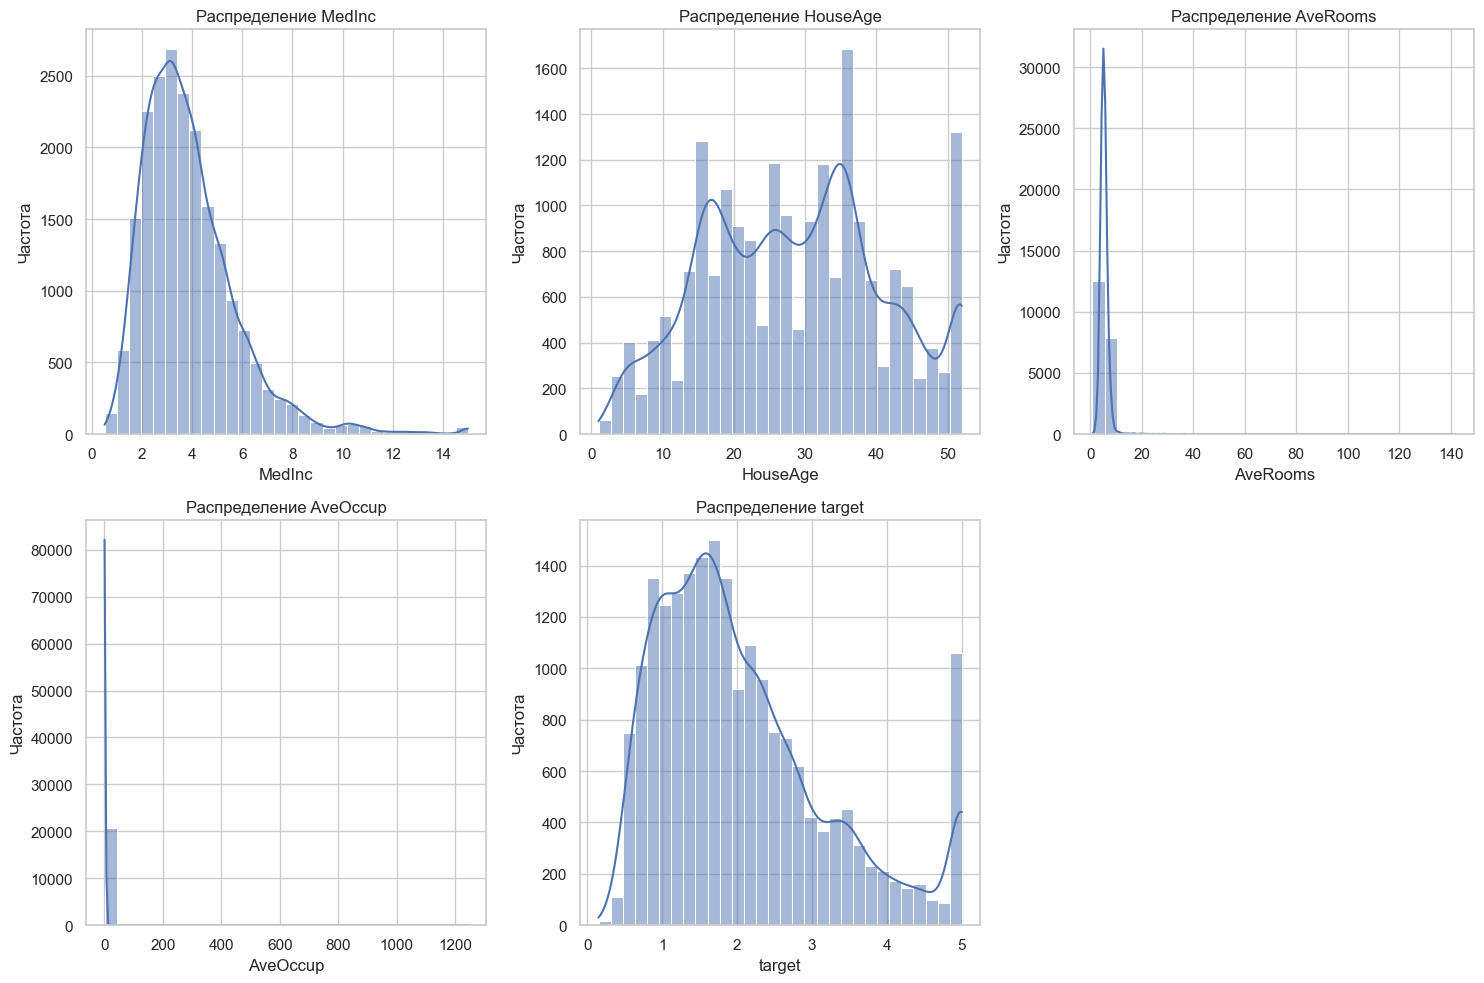

In [ ]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'target']

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

1. График имеет положительный смещённый влево характер это указывает, что большинство семей имеет небольшой доход.
Присуствует один пик от 2 до 4 показывающий наибольшие количество жителей в рамках этого дохода.
2. График имеет положительный равномерный немного плавающий рост показывающий, показывающий разнообразие в постройки по годам домов.
Присуствуют два пика и два провала, пики показывают, самый большой пик это от 30 до 38 лет, что говорит, что страные дома преобладают однако есть пик в от 15 до 18 лет, говорящий, что в районе есть и новые дома. Однако между этими пиками есть два провала в диапазоне 19 лет, что говорит отом, что жители в данным возрате продают дом или сносят его. И опять же потом идёт небольшой подъём с 22 годовалых домов и просадка на 27 летних домах.
3. График имеет сильный смещённый в лево и положительный характер указывающий, что жителям нравятся небольшое количество комнат, однако по графику видно, что в районе есть некоторое единичное количество больших домов и особняков.
На графике имеется один сильный пик который говорит о том, что 2-4 комнаты является основной предпочитаемой планировкой.
4. График имеет короткий резкий рост указывающий, что абсолютное большинство имеют не более 1-2 спален в доме, все остальное количество спален представлено в редких случая.
5. График имеет положительный равномерный рост указывающий, что большинство домов имеют низкую стоимость, это могут быть дома для временной аренды или старые дома под продажу исходя из графиков выше.
График имеет два пика один в районе от 0,5 до 1,8 это указывает на большое количество дешёвого жилья и второй большой пик от 5, что показывает, что в квартале много догорогово элитного жилья.


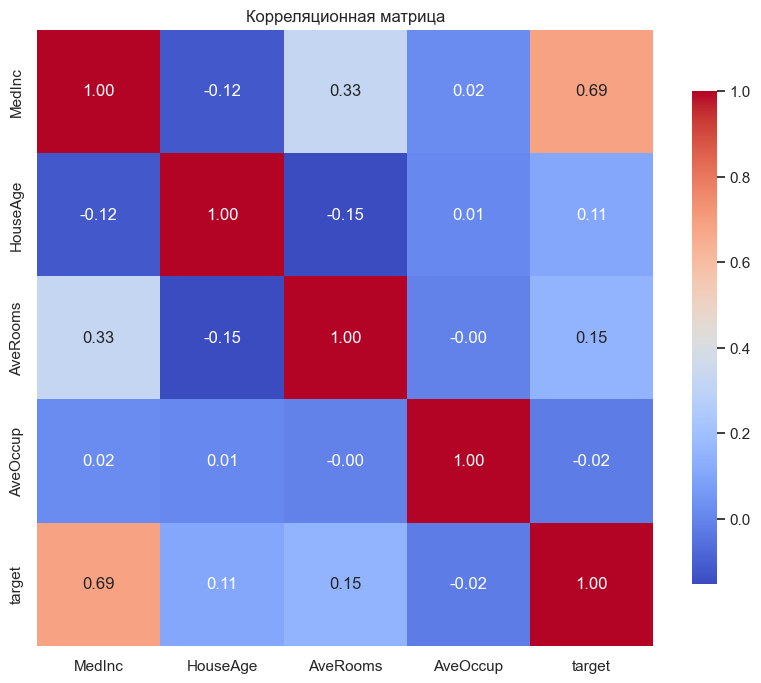

In [ ]:
# Визуализация корреляции между выбранными переменными
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица')
plt.show()

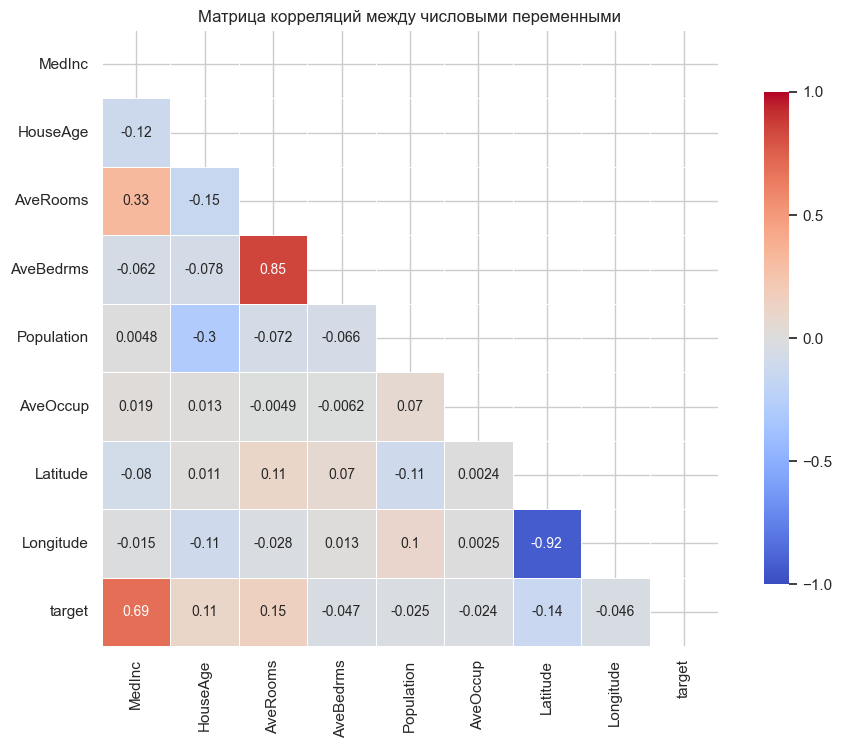

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()


Сильная положительные корреляции MedInc и target указывает на то, что увеличение дохода ведет к увеличению стоимости жилья, так же есть слабая положительная корелляция по AveRooms, что может указывать, что количество комнат влияет на увеличение стоимости.

Сильная отрицательная корреляция между AveOccup и target указывает на то, что более высокое количество жильцов связано с более низкой стоимостью жилья, что может быть связано с тем, что более доступные дома часто занимают больше жильцов, так же отрицательная корелляция HouseAge указывает, что возраст дома не влияет на количество комнат.

Значения, близкие к нулю, указывают на отсутствие значимой связи между переменными между HouseAge и AveOccup близка к 0, это может означать, что возраст дома не влияет на количество жильцов а так же AveRooms, что количество комнат также не влияет.

##### 3. Построение моделей:

— Разделите данные на обучающую и тестовую выборки.

— Постройте и обучите модели RandomForestRegressor и GradientBoostingRegressor.

— Постарайтесь оптимизировать их гиперпараметры для улучшения результатов на обучающей выборке.

In [ ]:
df_home = df
# Извлечём diagnosis из признаков
X = df_home.drop('target', axis=1)
# Определим целевую переменную
target = df_home['target']

In [ ]:
# Стандартизация данных
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

# Создание нового DataFrame со стандартизированными данными
df_scaled = pd.DataFrame(X_scaler, columns=X.columns)

In [ ]:
# Определяем переменные для обучения
df_irus_scaled = df_scaled
y = target

# Разделяем данные на обучающий и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(df_irus_scaled, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (16512, 8)
Размер тестового набора: (4128, 8)


In [ ]:
# Установка/начало таймера
start_time = time.time()

# Создание и обучение ансамбля RandomForest
forest_model = RandomForestRegressor(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)

# Предсказания
forest_predictions = forest_model.predict(X_test)

# Расчет метрик
fores_mse = mean_squared_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

# Окончание таймера
end_time = time.time()
RFR_execution_time = end_time - start_time

# Вывод результата
print(f"RandomForestRegressor MSE: {fores_mse}")
print(f"R2 для RandomForestRegressor: {forest_r2}")
print(f"Время выполнения RandomForestRegressor: {RFR_execution_time:.2f} секунд")

RandomForestRegressor MSE: 0.2539888635138779
R2 для RandomForestRegressor: 0.8061758826966876
Время выполнения RandomForestRegressor: 48.76 секунд


In [ ]:
# Установка/начало таймера
start_time = time.time()

# Создание и обучение ансамбля GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
boosting_model.fit(X_train, y_train)

# Предсказания
boosting_predictions = boosting_model.predict(X_test)

# Расчет метрик
boosting_mse = mean_squared_error(y_test, boosting_predictions)
boosting_r2 = r2_score(y_test, boosting_predictions)

# Окончание таймера
end_time = time.time()
GBR_execution_time = end_time - start_time

# Вывод результата
print(f"GradientBoostingRegressor MSE: {boosting_mse}")
print(f"R2 для GradientBoostingRegressor: {boosting_r2}")
print(f"Время выполнения GradientBoostingRegressor: {GBR_execution_time:.2f} секунд")

GradientBoostingRegressor MSE: 0.26149953641834794
R2 для GradientBoostingRegressor: 0.8004443339747364
Время выполнения GradientBoostingRegressor: 15.20 секунд


In [ ]:
# Установка/начало таймера
start_time = time.time()

# Построение и обучение модели RandomForestRegressor
rand_forest_model = RandomForestRegressor(random_state=42)  # random_state для воспроизводимости результатов

# Определение сетки гиперпараметров для оптимизации
rand_fores_param = {
    'n_estimators': [100, 200], # Количество деревьев в лесу (базовых моделей)
    'max_depth': [None, 10, 20], # Максимальная глубина каждого дерева (None означает, что глубина не ограничена)
    'min_samples_split': [2, 5], # Минимальное количество образцов, необходимых для разделения узла
    'min_samples_leaf': [1, 2], # Минимальное количество образцов в листовом узле
    'max_features': [0.1, 1.0] # Пропорция от общего числа признаков, используемая для поиска лучшего разделения
}

# Оптимизация гиперпараметров с помощью GridSearchCV
rand_fores_search = GridSearchCV(
    rand_forest_model, # Модель, которую мы хотим оптимизировать
    rand_fores_param, # Сетка гиперпараметров для поиска
    cv=5, # Количество фолдов для кросс-валидации
    scoring='neg_mean_squared_error', # Метрика для оценки модели (отрицательная MSE)
    n_jobs=-1 # Использовать все доступные ядра процессора для параллельной обработки
)

# Обучение модели с использованием GridSearchCV, обучение модели на обучающем наборе данных
rand_fores_search.fit(X_train, y_train)

# Получение лучшей модели после оптимизации гиперпараметров, лучшая модель с найденными гиперпараметрами
best_rand_fores_model = rand_fores_search.best_estimator_

# Предсказания на тестовом наборе данных, получение предсказаний для тестовых данных
rand_fores_predictions = best_rand_fores_model.predict(X_test)

# Расчет средней квадратичной ошибки (MSE) для предсказаний, сравнение предсказаний с истинными значениями
rand_fores_f_mse = mean_squared_error(y_test, rand_fores_predictions)

# Расчет коэффициента детерминации (R2) для предсказаний, оценка качества модели
rand_fores_f_r2 = r2_score(y_test, rand_fores_predictions)

# Окончание таймера
end_time = time.time()
RFRF_execution_time = end_time - start_time

# Вывод результата
print(f"Улучшеный RandomForestRegressor MSE: {rand_fores_f_mse}")
print(f"R2 для улучшеного RandomForestRegressor: {rand_fores_f_r2}")
print(f"Улучшеный RandomForestRegressor параметры: {rand_fores_search.best_params_}")
print(f"Время выполнения улучшеного RandomForestRegressor: {RFRF_execution_time:.2f} секунд")

Улучшеный RandomForestRegressor MSE: 0.2539654780242518
R2 для улучшеного RandomForestRegressor: 0.8061937286440326
Улучшеный RandomForestRegressor параметры: {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Время выполнения улучшеного RandomForestRegressor: 314.81 секунд


In [ ]:
# Установка/начало таймера
start_time = time.time()

# Построение и обучение GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Определение сетки гиперпараметров для оптимизации
gbr_param_grid = {
    'n_estimators': [100, 200], # Количество базовых моделей (деревьев) в ансамбле
    'learning_rate': [0.01, 0.1, 0.2], # Скорость обучения, контролирующая вклад каждой базовой модели
    'max_depth': [3, 5, 7], # Максимальная глубина каждого дерева
    'min_samples_split': [2, 5], # Минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2] # Минимальное количество образцов в листовом узле
}

# Создание экземпляра GridSearchCV для поиска по сетке
gbr_grid_search = GridSearchCV(
    gbr_model, # Модель, которую мы хотим оптимизировать
    gbr_param_grid, # Сетка гиперпараметров для поиска
    cv=5, # Количество фолдов для кросс-валидации
    scoring='neg_mean_squared_error', # Метрика для оценки модели (отрицательная MSE)
    n_jobs=-1 # Использовать все доступные ядра процессора для параллельной обработки
)

# Обучение модели с использованием GridSearchCV, обучение модели на обучающем наборе данных
gbr_grid_search.fit(X_train, y_train)

# Получение лучшей модели после оптимизации гиперпараметров, лучшая модель с найденными гиперпараметрами
best_gb_model = gbr_grid_search.best_estimator_

# Предсказания на тестовом наборе данных, получение предсказаний для тестовых данных
gbr_predictions = best_gb_model.predict(X_test)

# Расчет средней квадратичной ошибки (MSE) для предсказаний, сравнение предсказаний с истинными значениями
gbr_mse = mean_squared_error(y_test, gbr_predictions)

# Расчет коэффициента детерминации (R2) для предсказаний, оценка качества модели
gbr_r2 = r2_score(y_test, gbr_predictions)

# Окончание таймера
end_time = time.time()
GBRF_execution_time = end_time - start_time

# Вывод результатов
print(f"Улучшеный GradientBoostingRegressor MSE: {gbr_mse}")
print(f"R2 для улучшеного GradientBoostingRegressor: {gbr_r2}")
print(f"Парметры улучшеного GradientBoostingRegressor: {gbr_grid_search.best_params_}")
print(f"Время выполнения улучшеного RandomForestRegressor: {GBRF_execution_time:.2f} секунд")

Улучшеный GradientBoostingRegressor MSE: 0.20744952688117074
R2 для улучшеного GradientBoostingRegressor: 0.8416910061470639
Парметры улучшеного GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Время выполнения улучшеного RandomForestRegressor: 432.84 секунд


##### 4. Оценка моделей:

— Оцените качество моделей на тестовой выборке с использованием метрик RMSE (Root Mean Squared Error) и R² (коэффициент детерминации).

— Сравните результаты моделей, интерпретируйте их.

In [ ]:
# Расчет RMSE для RandomForestRegressor
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_predictions))
rand_fores_f_rmse = np.sqrt(mean_squared_error(y_test, rand_fores_predictions))
print(f"RandomForestRegressor RMSE: {forest_rmse}")
print(f"Улучшеный RandomForestRegressor RMSE: {rand_fores_f_rmse}")

# Расчет RMSE для GradientBoostingRegressor
boosting_rmse = np.sqrt(mean_squared_error(y_test, boosting_predictions))
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))
print(f"GradientBoostingRegressor  RMSE: {boosting_rmse}")
print(f"Улучшеный GradientBoostingRegressor  RMSE: {gbr_rmse}")

RandomForestRegressor RMSE: 0.5039730781637823
Улучшеный RandomForestRegressor RMSE: 0.5039498764998874
GradientBoostingRegressor  RMSE: 0.5113702537480528
Улучшеный GradientBoostingRegressor  RMSE: 0.4554662741424119


In [ ]:
# Результаты моделей:
print("RandomForestRegressor:")
print(f"RandomForestRegressor MSE: {fores_mse}")
print(f"RandomForestRegressor RMSE: {forest_rmse}")
print(f"R2 для RandomForestRegressor: {forest_r2}")
print(f"Время выполнения RandomForestRegressor: {RFR_execution_time:.2f} секунд")
print("Улучшеный RandomForestRegressor:")
print(f"Улучшеный RandomForestRegressor MSE: {rand_fores_f_mse}")
print(f"Улучшеный RandomForestRegressor RMSE: {rand_fores_f_rmse}")
print(f"R2 для улучшеного RandomForestRegressor: {rand_fores_f_r2}")
print(f"Время выполнения улучшеного RandomForestRegressor: {RFRF_execution_time:.2f} секунд")
print("GradientBoostingRegressor:")
print(f"GradientBoostingRegressor MSE: {boosting_mse}")
print(f"GradientBoostingRegressor  RMSE: {boosting_rmse}")
print(f"R2 для GradientBoostingRegressor: {boosting_r2}")
print(f"Время выполнения GradientBoostingRegressor: {GBR_execution_time:.2f} секунд")
print("Улучшеный GradientBoostingRegressor:")
print(f"Улучшеный GradientBoostingRegressor MSE: {gbr_mse}")
print(f"Улучшеный GradientBoostingRegressor  RMSE: {gbr_rmse}")
print(f"R2 для улучшеного GradientBoostingRegressor: {gbr_r2}")
print(f"Время выполнения GradientBoostingRegressor: {GBRF_execution_time:.2f} секунд")

RandomForestRegressor:
RandomForestRegressor MSE: 0.2539888635138779
RandomForestRegressor RMSE: 0.5039730781637823
R2 для RandomForestRegressor: 0.8061758826966876
Время выполнения RandomForestRegressor: 48.76 секунд
Улучшеный RandomForestRegressor:
Улучшеный RandomForestRegressor MSE: 0.2539654780242518
Улучшеный RandomForestRegressor RMSE: 0.5039498764998874
R2 для улучшеного RandomForestRegressor: 0.8061937286440326
Время выполнения улучшеного RandomForestRegressor: 314.81 секунд
GradientBoostingRegressor:
GradientBoostingRegressor MSE: 0.26149953641834794
GradientBoostingRegressor  RMSE: 0.5113702537480528
R2 для GradientBoostingRegressor: 0.8004443339747364
Время выполнения GradientBoostingRegressor: 15.20 секунд
Улучшеный GradientBoostingRegressor:
Улучшеный GradientBoostingRegressor MSE: 0.20744952688117074
Улучшеный GradientBoostingRegressor  RMSE: 0.4554662741424119
R2 для улучшеного GradientBoostingRegressor: 0.8416910061470639
Время выполнения GradientBoostingRegressor: 432

In [ ]:
# Сравнение результатов обычных моделей
print(f"GradientBoostingRegressor MSE {boosting_mse} в сравнение с RandomForestRegressor MSE {fores_mse}, разница состовляет: {boosting_mse - fores_mse:.4f}.\
    \nМодель {'GradientBoostingRegressor' if boosting_mse > fores_mse else 'RandomForestRegressor'} лучше в MSE.")
print(f"GradientBoostingRegressor R2 {boosting_r2} в сравнение с RandomForestRegressor R2 {forest_r2}, разница состовляет: {boosting_r2 - forest_r2:.4f}.\
    \nМодель {'GradientBoostingRegressor' if boosting_r2 > forest_r2 else 'RandomForestRegressor'} лучше в R2.")
print(f"GradientBoostingRegressor {GBR_execution_time:.2f}  секунд, в сравнение по времени выполнения с RandomForestRegressor {RFR_execution_time:.2f} секунд, разница состовляет: {GBR_execution_time - RFR_execution_time:.2f} секунд.\
    \nМодель {'GradientBoostingRegressor' if GBR_execution_time > RFR_execution_time else 'RandomForestRegressor'}, медленее производит расчёты.")

GradientBoostingRegressor MSE 0.26149953641834794 в сравнение с RandomForestRegressor MSE 0.2539888635138779, разница состовляет: 0.0075.    
Модель GradientBoostingRegressor лучше в MSE.
GradientBoostingRegressor R2 0.8004443339747364 в сравнение с RandomForestRegressor R2 0.8061758826966876, разница состовляет: -0.0057.    
Модель RandomForestRegressor лучше в R2.
GradientBoostingRegressor 15.20  секунд, в сравнение по времени выполнения с RandomForestRegressor 48.76 секунд, разница состовляет: -33.56 секунд.    
Модель RandomForestRegressor, медленее производит расчёты.


Из результатов сравнения базовых моделей мы видим, что модель GradientBoostingRegressor быстрее и более точная чем RandomForestRegressor, однако RandomForestRegressor немного лучше в вариациях данных.

In [ ]:
# Сравнение результатов RandomForestRegressor и улучшеной RandomForestRegressor
print(f"RandomForestRegressor улучшеный {rand_fores_f_mse} MSE в сравнении с обычным RandomForestRegressor {fores_mse} MSE, разница состовляет: {rand_fores_f_mse - fores_mse:.4f}.\
    \nМодель {'RandomForestRegressor улучшеная' if rand_fores_f_mse > fores_mse else 'RandomForestRegressor обычная'} лучше в MSE.")
print(f"RandomForestRegressor улучшеный {rand_fores_f_rmse} RMSE в сравнении с обычным RandomForestRegressor {forest_rmse} RMSE, разница состовляет: {rand_fores_f_rmse - forest_rmse:.4f}.\
    \nМодель {'RandomForestRegressor улучшеная' if rand_fores_f_rmse > forest_rmse else 'RandomForestRegressor обычная'} лучше в RMSE.")
print(f"RandomForestRegressor улучшеный {rand_fores_f_r2} R2 в сравнении с обычным RandomForestRegressor {forest_r2} R2, разница состовляет: {rand_fores_f_r2 - forest_r2:.4f}.\
    \nМодель {'RandomForestRegressor улучшеная' if rand_fores_f_r2 > forest_r2 else 'RandomForestRegressor обычная'} лучше в R2.")
print(f"RandomForestRegressor улучшеная {RFRF_execution_time:.2f} секунд, в сравнение по времени выполнения с RandomForestRegressor обычная {RFR_execution_time:.2f} секунд, разница состовляет: {RFRF_execution_time - RFR_execution_time:.2f} секунд.\
    \nМодель {'RandomForestRegressor улучшеная' if RFRF_execution_time > RFR_execution_time else 'RandomForestRegressor'}, медленее производит расчёты.")

RandomForestRegressor улучшеный 0.2539654780242518 MSE в сравнении с обычным RandomForestRegressor 0.2539888635138779 MSE, разница состовляет: -0.0000.    
Модель RandomForestRegressor обычная лучше в MSE.
RandomForestRegressor улучшеный 0.5039498764998874 RMSE в сравнении с обычным RandomForestRegressor 0.5039730781637823 RMSE, разница состовляет: -0.0000.    
Модель RandomForestRegressor обычная лучше в RMSE.
RandomForestRegressor улучшеный 0.8061937286440326 R2 в сравнении с обычным RandomForestRegressor 0.8061758826966876 R2, разница состовляет: 0.0000.    
Модель RandomForestRegressor улучшеная лучше в R2.
RandomForestRegressor улучшеная 314.81 секунд, в сравнение по времени выполнения с RandomForestRegressor обычная 48.76 секунд, разница состовляет: 266.05 секунд.    
Модель RandomForestRegressor улучшеная, медленее производит расчёты.


Разница между RandomForestRegressor улучшеной и обычной есть но она не существенна, однако RandomForestRegressor обычная быстрее производит рачёты.

In [ ]:
# Сравнение результатов GradientBoostingRegressor и улучшеной GradientBoostingRegressor
print(f"GradientBoostingRegressor улучшеный {gbr_mse} MSE в сравнении с обычным GradientBoostingRegressor {boosting_mse} MSE, разница состовляет: {gbr_mse - boosting_mse:.4f}.\
    \nМодель {'GradientBoostingRegressor улучшеная' if gbr_mse > boosting_mse else 'GradientBoostingRegressor обычная'} лучше в MSE.")
print(f"GradientBoostingRegressor улучшеный {gbr_rmse} RMSE в сравнении с обычным GradientBoostingRegressor {boosting_rmse} RMSE, разница состовляет: {gbr_rmse - boosting_rmse:.4f}.\
    \nМодель {'GradientBoostingRegressor улучшеная' if gbr_rmse > boosting_rmse else 'GradientBoostingRegressor обычная'} лучше в RMSE.")
print(f"GradientBoostingRegressor улучшеный {gbr_r2} R2 в сравнении с обычным GradientBoostingRegressor {boosting_r2} R2, разница состовляет: {gbr_r2 - boosting_r2:.4f}.\
    \nМодель {'GradientBoostingRegressor улучшеная' if gbr_r2 > boosting_r2 else 'GradientBoostingRegressor обычная'} лучше в R2.")
print(f"GradientBoostingRegressor улучшеная {GBRF_execution_time:.2f} секунд, в сравнение по времени выполнения с GradientBoostingRegressor обычная {GBR_execution_time:.2f} секунд, разница состовляет: {GBRF_execution_time - GBR_execution_time:.2f} секунд.\
    \nМодель {'GradientBoostingRegressor улучшеная' if GBRF_execution_time > GBR_execution_time else 'GradientBoostingRegressor'}, медленее производит расчёты.")

GradientBoostingRegressor улучшеный 0.20744952688117074 MSE в сравнении с обычным GradientBoostingRegressor 0.26149953641834794 MSE, разница состовляет: -0.0541.    
Модель GradientBoostingRegressor обычная лучше в MSE.
GradientBoostingRegressor улучшеный 0.4554662741424119 RMSE в сравнении с обычным GradientBoostingRegressor 0.5113702537480528 RMSE, разница состовляет: -0.0559.    
Модель GradientBoostingRegressor обычная лучше в RMSE.
GradientBoostingRegressor улучшеный 0.8416910061470639 R2 в сравнении с обычным GradientBoostingRegressor 0.8004443339747364 R2, разница состовляет: 0.0412.    
Модель GradientBoostingRegressor улучшеная лучше в R2.
GradientBoostingRegressor улучшеная 432.84 секунд, в сравнение по времени выполнения с GradientBoostingRegressor обычная 15.20 секунд, разница состовляет: 417.64 секунд.    
Модель GradientBoostingRegressor улучшеная, медленее производит расчёты.


GradientBoostingRegressor обычная модель лучше вовсем улучшеной версии кроме валидации данных R2.

##### 5. Анализ важности признаков и выводы:
— Используйте атрибут feature_importances_ для оценки важности признаков в каждой модели.

— На основе полученных данных сделайте выводы о том, какие признаки наиболее значимы и почему.

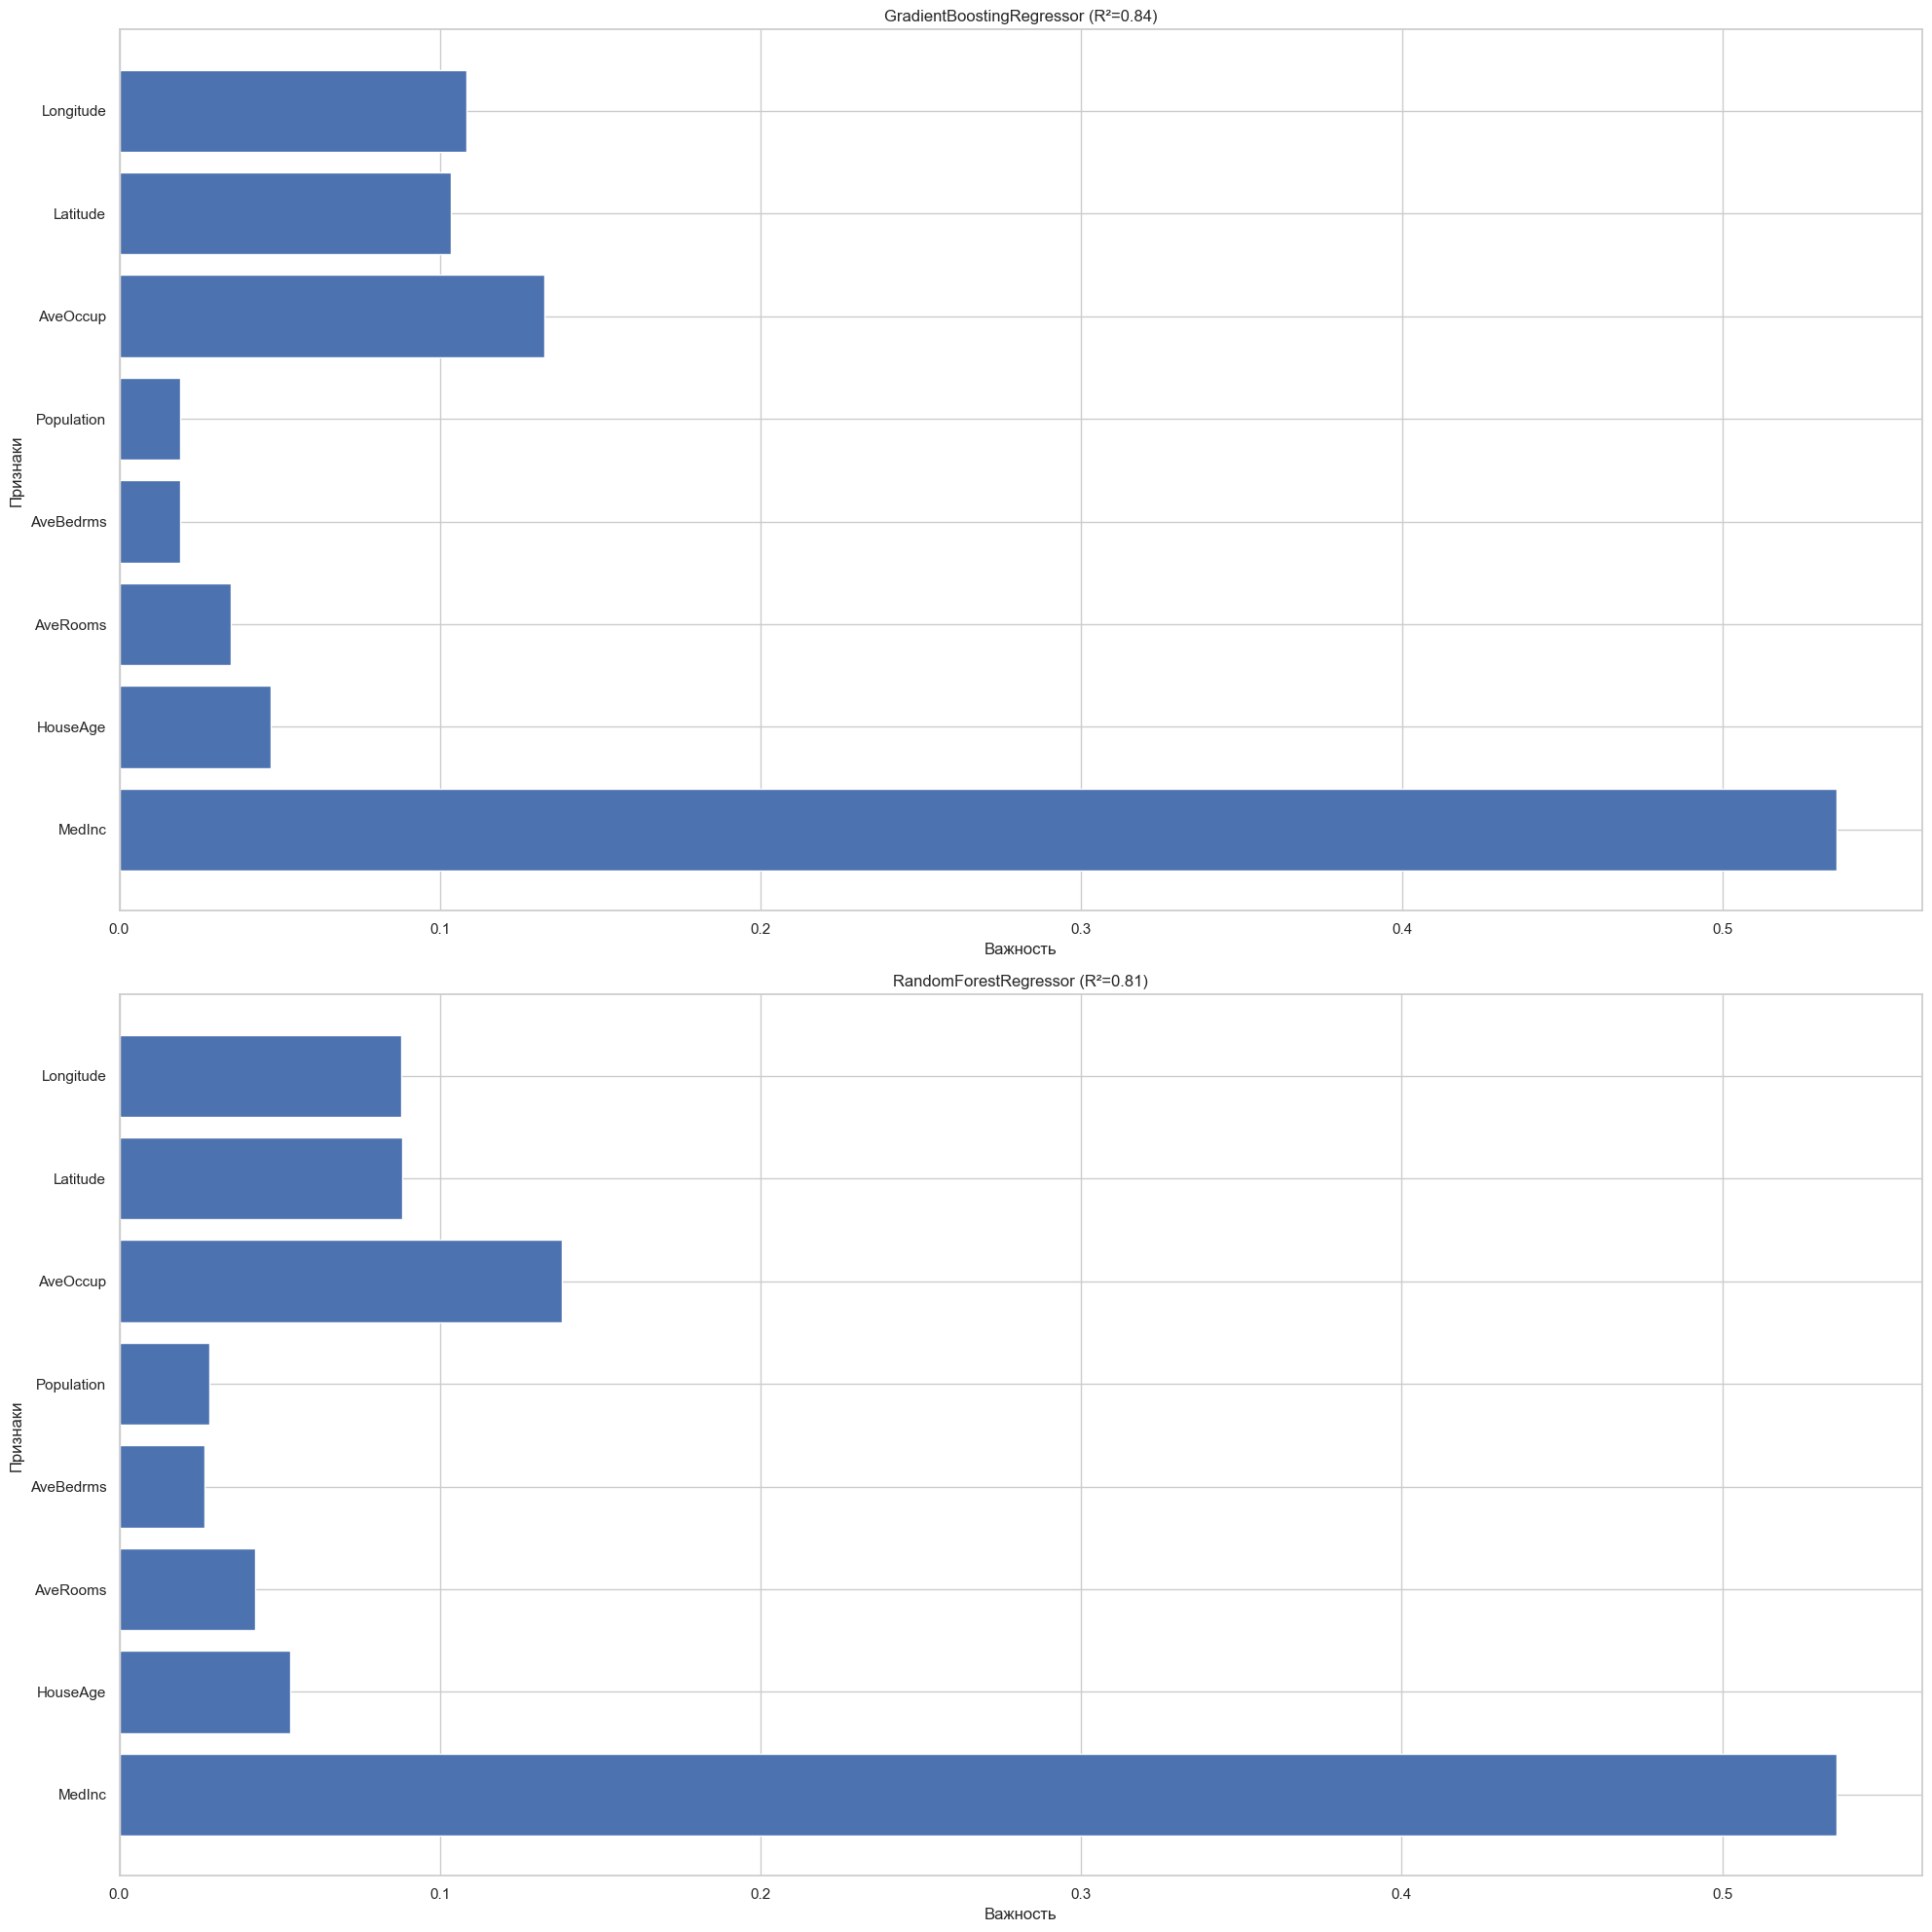

In [ ]:
models = {
    'GradientBoostingRegressor': best_gb_model,
    'RandomForestRegressor': best_rand_fores_model
}

# Обучение моделей и оценка важности признаков
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))
    feature_importances = model.feature_importances_

    ax.barh(np.arange(len(feature_importances)), feature_importances, align='center')
    ax.set_yticks(np.arange(len(X.columns)))
    ax.set_yticklabels(X.columns)
    ax.set_title(f'{name} (R²={score:.2f})')
    ax.set_xlabel('Важность')
    ax.set_ylabel('Признаки')

plt.tight_layout()
plt.show()

##### Сравнение производительности моделей

На графиках показаны важности признаков для улучшеных моделей: RandomForestRegressor и GradientBoostingRegressor, а также их коэффициенты детерминации (R2).
- RandomForestRegressor R2 = 0.81
- RGradientBoostingRegressor R2 = 0.84

Обе модели показывают высокие значения R2, но RGradientBoostingRegressor работает немного лучше, чем RandomForestRegressor.

##### Анализ важности признаков

Исходя из проведенного анализа, можно выделить ключевые признаки, которые оказали наибольшее влияние на прогноз:

1. MedInc (Средний доход населения в квартале): Этот признак оказался самым важным в моделях RandomForestRegressor и RGradientBoostingRegressor.
2. AveOccup (Средняя заполняемость дома): Этот признак занимает второе место по значимости в моделях RandomForestRegressor и RGradientBoostingRegressor.
3. Latitude (Широта жилого квартала) и Longitude (Долгота жилого квартала): Признаки имеют значительное влияние в моделях RandomForestRegressor и RGradientBoostingRegressor, однако в RGradientBoostingRegressor немного более выделяются.
4. AveRooms (Средние количество команат) и HouseAge (Средний возраст дома в квартале): Эти признаки менее значимы моделях RandomForestRegressor и RGradientBoostingRegressor, но имеют некоторое влияние.
5. AveBedrms (Средние количество спален) и Population (Население квартала): Эти признаки имеют ещё меньшую важность, но все равно влияющие на качество прогноза.

##### Соответствие между важными признаками и качеством прогнозов

Модель с более высокими коэффициентом детерминации RGradientBoostingRegressor придают больше внимания признакам, таким как широта и долгота жилого квартала, а модель RandomForestRegressor с немного низким коэффициентом детерминации отдаёт предпочтение количеству комнат и возрасту дома. Это обе модели более мнее правильно отдают предпочнение, в виду не высокого отрыва по коэффициентом детерминации обе они отдают предпочтение тем или иным важным параметрам при выборе дома.


##### Вывод

Сравнение моделей показало, что RandomForestRegressor и RGradientBoostingRegressor имеют близкую производительность. Основные признаки, влияющие на качество прогнозов, включают почти все признаки но особо не опираются на количество спален и население квартала.

##### Возможные пути для улучшения моделей

1. Добавление дополнительных признаков: Возможно, добавление новых, релевантных признаков может улучшить производительность моделей.
2. Переобучение моделей с учетом отброса неважных признаков: Возможно, исключение менее значимых признаков, таких как AveBedrms (Средние количество спален) и Population (Население квартала), может помочь избежать переобучения моделей и улучшить их общую производительность.
3. Hyperparameter tuning (настройка гиперпараметров): Проводить более тщательную настройку гиперпараметров моделей для достижения лучшей производительности.
Рассмотренные пути улучшений могут способствовать повышению точности прогнозов и общей производительности моделей.

##### 6. Дополнительные задачи (для желающих углубить знания):
— Проведите кросс-валидацию результатов.

— Исследуйте влияние удаления некоторых признаков на производительность моделей.

In [ ]:
# Определение моделей
models = {
    'GradientBoostingRegressor': best_gb_model,
    'RandomForestRegressor': best_rand_fores_model
}

# Кросс-валидация моделей без изменения в признаках, 5-кратная кросс-валидация
for name, model in models.items():
    print(f'Начало кросс-валидации для модели: {name}')

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f'{name} без удаления признаков - Cross-validated R²: {scores.mean():.2f} ± {scores.std():.2f}')

    # Вычисление MSE и RMSE
    mse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(mse)
    print(f'{name} без удаления признаков - Cross-validated MSE: {mse.mean():.2f} ± {mse.std():.2f}')
    print(f'{name} без удаления признаков - Cross-validated RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}')

# Удаление не важных признаков и повторная оценка
features_to_remove_nomayter = ['AveBedrms', 'Population', 'AveRooms', 'HouseAge']
X_nomayter_reduced = X.drop(columns=features_to_remove_nomayter)

# Разделение набора данных удаления не важных признаков на обучающую и тестовую выборки
X_nomayter_train_reduced, X_nomayter_test_reduced, y_nomayter_train_reduced, y_nomayter_test_reduced = train_test_split(X_nomayter_reduced, y, test_size=0.2, random_state=42)

# Повторная кросс-валидация с удалёнными не важными признаками
for name, model in models.items():
    print(f'Начало кросс-валидации для модели: {name} (удалены не важные признаки:{features_to_remove_nomayter})')

    scores = cross_val_score(model, X_nomayter_train_reduced, y_nomayter_train_reduced, cv=5, scoring='r2')
    print(f'{name} (удалены не важные признаки) - Cross-validated R²: {scores.mean():.2f} ± {scores.std():.2f}')

    # Вычисление MSE и RMSE
    mse = -cross_val_score(model, X_nomayter_train_reduced, y_nomayter_train_reduced, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(mse)
    print(f'{name} (удалены не важные признаки) - Cross-validated MSE: {mse.mean():.2f} ± {mse.std():.2f}')
    print(f'{name} (удалены не важные признаки) - Cross-validated RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}')

# Удаление важных признаков и повторная оценка
features_to_remove_mayter = ['MedInc', 'AveOccup', 'Latitude', 'Longitude']
X_mayter_reduced = X.drop(columns=features_to_remove_mayter)

# Разделение набора данных удаления важных признаков на обучающую и тестовую выборки
X_mayter_train_reduced, X_mayter_test_reduced, y_mayter_train_reduced, y_mayter_test_reduced = train_test_split(X_mayter_reduced, y, test_size=0.2, random_state=42)

# Повторная кросс-валидация с удалёнными важными признаками
for name, model in models.items():
    print(f'Начало кросс-валидации для модели: {name} (удалены важные признаки: {features_to_remove_mayter})')

    scores = cross_val_score(model, X_mayter_train_reduced, y_mayter_train_reduced, cv=5, scoring='r2')
    print(f'{name} (удалены важные признаки) - Cross-validated R²: {scores.mean():.2f} ± {scores.std():.2f}')

    # Вычисление MSE и RMSE
    mse = -cross_val_score(model, X_mayter_train_reduced, y_mayter_train_reduced, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(mse)
    print(f'{name} (удалены важные признаки) - Cross-validated MSE: {mse.mean():.2f} ± {mse.std():.2f}')
    print(f'{name} (удалены важные признаки) - Cross-validated RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}')

Начало кросс-валидации для модели: GradientBoostingRegressor
GradientBoostingRegressor без удаления признаков - Cross-validated R²: 0.84 ± 0.01
GradientBoostingRegressor без удаления признаков - Cross-validated MSE: 0.22 ± 0.00
GradientBoostingRegressor без удаления признаков - Cross-validated RMSE: 0.47 ± 0.00
Начало кросс-валидации для модели: RandomForestRegressor
RandomForestRegressor без удаления признаков - Cross-validated R²: 0.81 ± 0.00
RandomForestRegressor без удаления признаков - Cross-validated MSE: 0.26 ± 0.00
RandomForestRegressor без удаления признаков - Cross-validated RMSE: 0.51 ± 0.00
Начало кросс-валидации для модели: GradientBoostingRegressor (удалены не важные признаки:['AveBedrms', 'Population', 'AveRooms', 'HouseAge'])
GradientBoostingRegressor (удалены не важные признаки) - Cross-validated R²: 0.82 ± 0.01
GradientBoostingRegressor (удалены не важные признаки) - Cross-validated MSE: 0.24 ± 0.01
GradientBoostingRegressor (удалены не важные признаки) - Cross-valida

По результатам кросс-валидации можем сделать вывод, что удаление не важных признаков не сильно влияет на результаты обучения моделей это подтверждает, что эти признаки действительно не влияли на обучение.
При удалении важных признаков обе модели показывают весьма малые значения R2, удаление данных признаков сильно ухудшает показатели модели а так же свидетельсвует об явном переобучении модели.
Результаты показывают, что важные признаки, такие как MedInc, AveOccup, Latitude и Longitude, играют критическую роль в обучении моделей. Их удаление приводит к значительному ухудшению качества предсказаний.